In [15]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn import metrics
from sklearn.svm import LinearSVC, SVC
from sklearn.model_selection import KFold
from sklearn import metrics


In [16]:
#消除success的背景區域圖
csv_data = pd.read_csv('database_HOG.csv')

In [17]:
csv_data = csv_data.drop('Unnamed: 0',axis = 1)   #消除第0行

In [18]:
'''
label_name = {
    0:'success',
    1:'fail',
    2:'noExtusion'
}

csv_data['label'] = csv_data['label'].map(label_name)   #將label的0 1 2置換成列印狀態
'''
csv_data


,0,1,2,3,4,5,6,7,8,9,...,135,136,137,138,139,140,141,142,143,label
0,0.067604,0.144930,0.195894,0.139601,0.109187,0.115964,0.105291,0.144114,0.101662,0.044503,...,0.118464,0.113335,0.258546,0.258546,0.258546,0.119759,0.223965,0.258546,0.172659,0
1,0.122304,0.186118,0.258400,0.149942,0.213387,0.122805,0.191628,0.068383,0.106367,0.125764,...,0.164379,0.087773,0.211230,0.159155,0.255840,0.075572,0.197187,0.166449,0.255840,0
2,0.096245,0.157364,0.274583,0.274583,0.179411,0.035995,0.034762,0.066208,0.060008,0.105648,...,0.124940,0.117372,0.119153,0.118998,0.128060,0.139923,0.215803,0.199235,0.143036,0
3,0.089704,0.128912,0.242266,0.130620,0.093848,0.096167,0.211394,0.149677,0.065260,0.161129,...,0.223295,0.144919,0.160136,0.184843,0.157746,0.094110,0.116322,0.117224,0.274690,0
4,0.234025,0.215182,0.201146,0.125925,0.177319,0.272684,0.100370,0.059686,0.104507,0.236746,...,0.127502,0.294867,0.294867,0.164168,0.081912,0.289939,0.274766,0.155836,0.132669,0
5,0.146419,0.148590,0.086042,0.135365,0.144399,0.152497,0.129191,0.087993,0.130120,0.125971,...,0.113782,0.137731,0.211333,0.196439,0.070817,0.029675,0.039129,0.123119,0.195112,0
6,0.083109,0.157988,0.300325,0.081161,0.082846,0.123722,0.208330,0.069954,0.061097,0.106571,...,0.057058,0.104018,0.274599,0.232656,0.129554,0.068000,0.126047,0.206140,0.017293,0
7,0.103078,0.241545,0.159545,0.072584,0.098725,0.176691,0.231571,0.126916,0.093432,0.150650,...,0.257317,0.263347,0.243412,0.184728,0.148344,0.142616,0.226459,0.153660,0.192521,0
8,0.102061,0.227360,0.198387,0.084566,0.142908,0.114095,0.235825,0.226376,0.157392,0.129953,...,0.214287,0.206422,0.233289,0.115737,0.094394,0.078473,0.120086,0.249665,0.191117,0
9,0.229398,0.164536,0.144636,0.183432,0.145382,0.117053,0.148869,0.123298,0.101762,0.192967,...,0.087367,0.186746,0.224256,0.139866,0.171240,0.106210,0.232804,0.249097,0.123853,0


In [19]:
# 判斷是否重複
csv_data.duplicated()
#移除重複數據
csv_data = csv_data.drop_duplicates()
csv_data

,0,1,2,3,4,5,6,7,8,9,...,135,136,137,138,139,140,141,142,143,label
0,0.067604,0.144930,0.195894,0.139601,0.109187,0.115964,0.105291,0.144114,0.101662,0.044503,...,0.118464,0.113335,0.258546,0.258546,0.258546,0.119759,0.223965,0.258546,0.172659,0
1,0.122304,0.186118,0.258400,0.149942,0.213387,0.122805,0.191628,0.068383,0.106367,0.125764,...,0.164379,0.087773,0.211230,0.159155,0.255840,0.075572,0.197187,0.166449,0.255840,0
2,0.096245,0.157364,0.274583,0.274583,0.179411,0.035995,0.034762,0.066208,0.060008,0.105648,...,0.124940,0.117372,0.119153,0.118998,0.128060,0.139923,0.215803,0.199235,0.143036,0
3,0.089704,0.128912,0.242266,0.130620,0.093848,0.096167,0.211394,0.149677,0.065260,0.161129,...,0.223295,0.144919,0.160136,0.184843,0.157746,0.094110,0.116322,0.117224,0.274690,0
4,0.234025,0.215182,0.201146,0.125925,0.177319,0.272684,0.100370,0.059686,0.104507,0.236746,...,0.127502,0.294867,0.294867,0.164168,0.081912,0.289939,0.274766,0.155836,0.132669,0
5,0.146419,0.148590,0.086042,0.135365,0.144399,0.152497,0.129191,0.087993,0.130120,0.125971,...,0.113782,0.137731,0.211333,0.196439,0.070817,0.029675,0.039129,0.123119,0.195112,0
6,0.083109,0.157988,0.300325,0.081161,0.082846,0.123722,0.208330,0.069954,0.061097,0.106571,...,0.057058,0.104018,0.274599,0.232656,0.129554,0.068000,0.126047,0.206140,0.017293,0
7,0.103078,0.241545,0.159545,0.072584,0.098725,0.176691,0.231571,0.126916,0.093432,0.150650,...,0.257317,0.263347,0.243412,0.184728,0.148344,0.142616,0.226459,0.153660,0.192521,0
8,0.102061,0.227360,0.198387,0.084566,0.142908,0.114095,0.235825,0.226376,0.157392,0.129953,...,0.214287,0.206422,0.233289,0.115737,0.094394,0.078473,0.120086,0.249665,0.191117,0
9,0.229398,0.164536,0.144636,0.183432,0.145382,0.117053,0.148869,0.123298,0.101762,0.192967,...,0.087367,0.186746,0.224256,0.139866,0.171240,0.106210,0.232804,0.249097,0.123853,0


In [6]:
display(csv_data.describe())      #使用describe()函數查看每一列的描述性統計量

,0,1,2,3,4,5,6,7,8,9,...,135,136,137,138,139,140,141,142,143,label
count,36807.000000,36807.000000,36807.000000,36807.000000,36807.000000,36807.000000,36807.000000,36807.000000,36807.000000,36807.000000,...,36807.000000,36807.000000,36807.000000,36807.000000,36807.000000,36807.000000,36807.000000,36807.000000,36807.000000,36807.000000
mean,0.120704,0.131673,0.148108,0.124955,0.136574,0.121632,0.128583,0.114457,0.114316,0.134851,...,0.147921,0.160741,0.177257,0.149587,0.162928,0.145651,0.172038,0.159304,0.151614,0.674057
std,0.080467,0.081160,0.092364,0.070785,0.079102,0.072488,0.075651,0.070280,0.074348,0.083054,...,0.079295,0.089854,0.096251,0.081333,0.089035,0.079851,0.090917,0.083805,0.079474,0.695438
min,0.000601,0.000395,0.000152,0.000000,0.000517,0.000000,0.000000,0.000019,0.000023,0.000501,...,0.000864,0.000057,0.000168,0.000076,0.000514,0.000000,0.000208,0.000197,0.000790,0.000000
25%,0.065071,0.072518,0.083175,0.073138,0.081770,0.068184,0.071547,0.060766,0.062229,0.074930,...,0.088924,0.091940,0.105656,0.087524,0.099016,0.084832,0.102390,0.094883,0.093179,0.000000
50%,0.103252,0.117453,0.131749,0.113850,0.124345,0.109908,0.121040,0.106045,0.099902,0.118007,...,0.137920,0.151742,0.168492,0.140956,0.153701,0.136365,0.165678,0.152244,0.142652,1.000000
75%,0.152298,0.175861,0.195815,0.165088,0.173312,0.160319,0.174784,0.155812,0.147180,0.174851,...,0.198522,0.222336,0.244132,0.203840,0.217347,0.197481,0.239309,0.218365,0.201173,1.000000
max,0.563845,0.513437,0.558815,0.512230,0.495193,0.446889,0.453142,0.453142,0.472206,0.563845,...,0.474600,0.463546,0.514231,0.533870,0.682914,0.505416,0.521915,0.486406,0.509328,2.000000


In [7]:
csv_data.std()  #使用std()函數可以求得DataFrame對象每一列的標準差

0        0.080467
1        0.081160
2        0.092364
3        0.070785
4        0.079102
5        0.072488
6        0.075651
7        0.070280
8        0.074348
9        0.083054
10       0.081237
11       0.089877
12       0.074567
13       0.083109
14       0.078268
15       0.089998
16       0.082269
17       0.079780
18       0.078428
19       0.087699
20       0.097692
21       0.081020
22       0.089819
23       0.075159
24       0.081720
25       0.076548
26       0.078364
27       0.080785
28       0.086829
29       0.094561
           ...   
115      0.072020
116      0.080638
117      0.084082
118      0.084137
119      0.093381
120      0.075811
121      0.084885
122      0.074971
123      0.086329
124      0.079876
125      0.084485
126      0.075699
127      0.084028
128      0.090804
129      0.077891
130      0.085543
131      0.072629
132      0.083382
133      0.076937
134      0.075426
135      0.079295
136      0.089854
137      0.096251
138      0.081333
139      0

In [20]:
from sklearn.model_selection import train_test_split
'''
#數據打亂
from sklearn.utils import shuffle
csv_data = shuffle(csv_data)
print(csv_data)
'''
Features = csv_data.drop('label',axis=1)             
Label = csv_data['label']
X_train, X_test, y_train, y_test = train_test_split(Features, Label, test_size=0.1, random_state=0) #分割1成測試就好
#將序列重排
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)


###  進行validation 將資料分為五等分    其中四等拿來train 一等拿來test  ,故可訓練出五種分類器

In [12]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Imputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

Features = csv_data.drop('label',axis=1)             
Label = csv_data['label']
X_train, X_test, y_train, y_test = train_test_split(Features, Label, test_size=0.2, random_state=0) #分割数据集


In [9]:
param_grid = [
  {'C': [10 ,30 ,70 ,100 , 150], 'gamma': [0.1 ,0.2 ,0.3 ,0.4 ,0.5],'kernel': ['rbf'],'decision_function_shape':['ovo']}
]
svc_model = SVC()

clf = GridSearchCV(svc_model, param_grid, cv=5)
clf.fit(X_train, y_train)

best_model = clf.best_estimator_
print(clf.best_params_)

y_pred = best_model.predict(X_test)
print('accuracy', accuracy_score(y_test, y_pred))

{'C': 30, 'decision_function_shape': 'ovo', 'gamma': 0.5, 'kernel': 'rbf'}
accuracy 0.9102146155935887


In [21]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Imputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
k_fold = KFold(n_splits=5, shuffle=True, random_state=42)
model = SVC(C = 30 ,kernel = 'rbf' ,random_state=42 ,decision_function_shape = 'ovo',gamma = 2) 
Features = X_train                  
Label = y_train

In [22]:
accuracies = []
confmats = []
cup = 0
for train_index, test_index in k_fold.split(Label):
    #training
    X = Features.loc[train_index]
    y = Label.loc[train_index]         
    trained = model.fit(X, y)
    
    #testing
    X = Features.loc[test_index]
    y = Label.loc[test_index]       
    accuracy = trained.score(X, y)
    accuracies.append(trained.score(X, y))
    y_pred = model.predict(X)
    confmats.append(metrics.confusion_matrix(y, y_pred))
    #將最高的模型紀錄起來留給test data
    if accuracy >= cup :
        svm_model = model
        cup = accuracy
accuracies  #五個模型的準確度
    

[0.9311801992152128,
 0.9266415094339623,
 0.9322264150943397,
 0.9207547169811321,
 0.9278490566037736]

In [23]:
acc = np.array(accuracies)
print("平均值 = {:f}".format(np.average(acc)))
print("標準差 = {:f}".format(np.std(acc)))

平均值 = 0.927730
標準差 = 0.004049


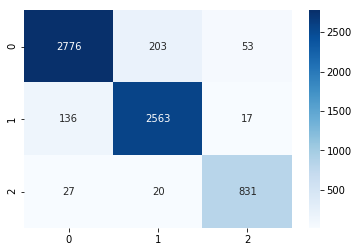

In [24]:
sns.heatmap(confmats[0], cmap="Blues", annot=True, fmt="d")

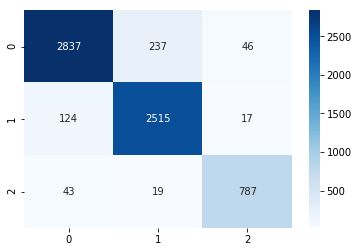

In [25]:
sns.heatmap(confmats[1], cmap="Blues", annot=True, fmt="d")

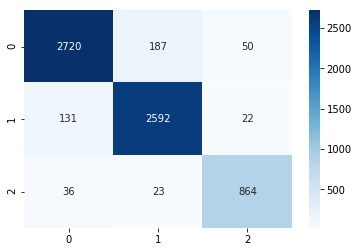

In [26]:
sns.heatmap(confmats[2], cmap="Blues", annot=True, fmt="d")

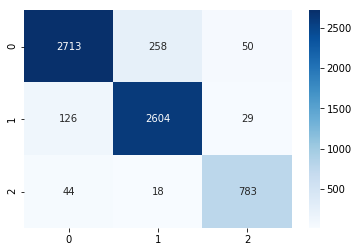

In [27]:
sns.heatmap(confmats[3], cmap="Blues", annot=True, fmt="d")

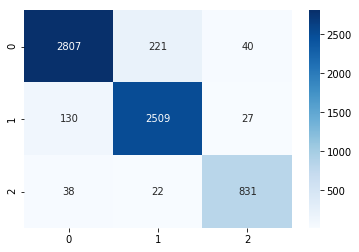

In [28]:
sns.heatmap(confmats[4], cmap="Blues", annot=True, fmt="d")

In [29]:

from sklearn.metrics import accuracy_score
X = X_test
y = y_test       
y_pred = svm_model.predict(X) 
accuracy = accuracy_score(y, y_pred)  # 準確度 =  分類成功的樣本數 / 總樣本數
#accuracy = svm_model.score(X_preprocess, y)  #不用scikit learn的模型分數來做  ，結果同上哈哈哈
print("accuracy : {:f}".format(accuracy))

accuracy : 0.930997


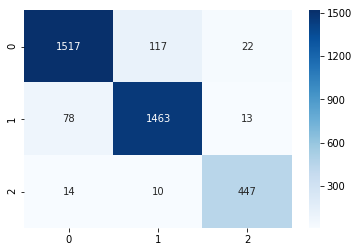

In [30]:
sns.heatmap(metrics.confusion_matrix(y, y_pred), cmap="Blues", annot=True, fmt="d")


In [31]:
print( metrics.cohen_kappa_score(y, y_pred))

0.8858029588237988


In [32]:
from sklearn.metrics import classification_report
target_names = ['Success', 'Fail', 'Background']
print("d=3 ; theta = 0 的分類狀況:")
print()
print(classification_report(y, y_pred, target_names=target_names))

d=3 ; theta = 0 的分類狀況:

              precision    recall  f1-score   support

     Success       0.94      0.92      0.93      1656
        Fail       0.92      0.94      0.93      1554
  Background       0.93      0.95      0.94       471

   micro avg       0.93      0.93      0.93      3681
   macro avg       0.93      0.94      0.93      3681
weighted avg       0.93      0.93      0.93      3681



In [33]:
#learning curve
from sklearn.model_selection import learning_curve
   
train_sizes, train_scores, test_scores = learning_curve(estimator=svm_model, X=X_train, y=y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=10, n_jobs=2)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

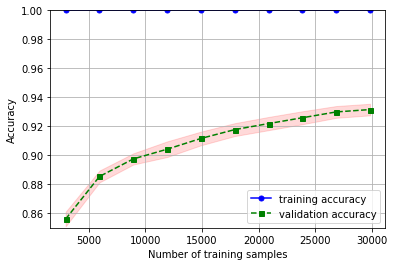

In [34]:
import matplotlib.pyplot as plt
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='validation accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='red')
plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.85, 1.0])
plt.savefig('D:\photo\learning_curve.png')
plt.show()


In [21]:
#gamma = 0.5
from sklearn.model_selection import validation_curve
param_range = [1,10 ,30 , 70, 100]    # c
model = SVC(kernel = 'rbf' ,random_state=42 ,decision_function_shape = 'ovo',gamma = 0.5)
#pipkine 無法用現暫不用
train_scores, test_scores = validation_curve(estimator=model, X=X_train, y=y_train, param_name='C', param_range=param_range, cv=5)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

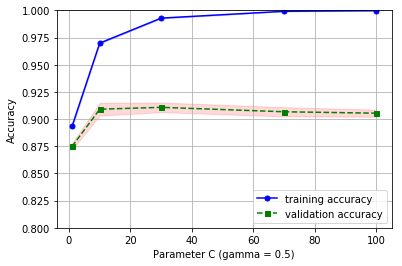

In [22]:
plt.plot(param_range, train_mean, color='blue', marker='o', markersize=5, label='training accuracy')
plt.fill_between(param_range, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(param_range, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='validation accuracy')
plt.fill_between(param_range, test_mean + test_std, test_mean - test_std, alpha=0.15, color='red')
plt.grid()
#plt.xscale('log')
plt.xlabel('Parameter C (gamma = 0.5)')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.0])
#plt.savefig('D:\photo\vc.png')
plt.show()

In [9]:
#gamma = 0.1
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Imputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import validation_curve
param_range = [1,10 ,30 , 70, 100]    # c
model = SVC(kernel = 'rbf' ,random_state=42 ,decision_function_shape = 'ovo',gamma = 0.1)
#pipkine 無法用現暫不用
train_scores, test_scores = validation_curve(estimator=model, X=X_train, y=y_train, param_name='C', param_range=param_range, cv=5)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

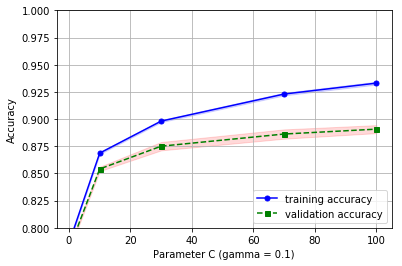

In [11]:
import matplotlib.pyplot as plt
plt.plot(param_range, train_mean, color='blue', marker='o', markersize=5, label='training accuracy')
plt.fill_between(param_range, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(param_range, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='validation accuracy')
plt.fill_between(param_range, test_mean + test_std, test_mean - test_std, alpha=0.15, color='red')
plt.grid()
#plt.xscale('log')
plt.xlabel('Parameter C (gamma = 0.1)')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.0])
#plt.savefig('D:\photo\vc.png')
plt.show()

In [12]:
#gamma = 1
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Imputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import validation_curve
param_range = [1,10 ,30 , 70, 100]    # c
model = SVC(kernel = 'rbf' ,random_state=42 ,decision_function_shape = 'ovo',gamma = 1)
#pipkine 無法用現暫不用
train_scores, test_scores = validation_curve(estimator=model, X=X_train, y=y_train, param_name='C', param_range=param_range, cv=5)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

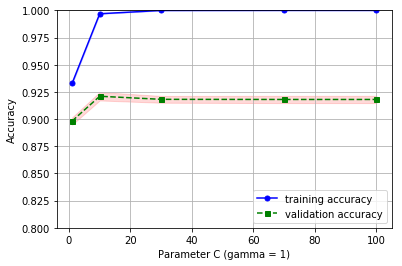

In [13]:
plt.plot(param_range, train_mean, color='blue', marker='o', markersize=5, label='training accuracy')
plt.fill_between(param_range, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(param_range, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='validation accuracy')
plt.fill_between(param_range, test_mean + test_std, test_mean - test_std, alpha=0.15, color='red')
plt.grid()
#plt.xscale('log')
plt.xlabel('Parameter C (gamma = 1)')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.0])
#plt.savefig('D:\photo\vc.png')
plt.show()

In [14]:
#gamma = 2
from sklearn.model_selection import validation_curve
param_range = [1,10 ,30 , 70, 100]    # c
model = SVC(kernel = 'rbf' ,random_state=42 ,decision_function_shape = 'ovo',gamma = 2)
#pipkine 無法用現暫不用
train_scores, test_scores = validation_curve(estimator=model, X=X_train, y=y_train, param_name='C', param_range=param_range, cv=5)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

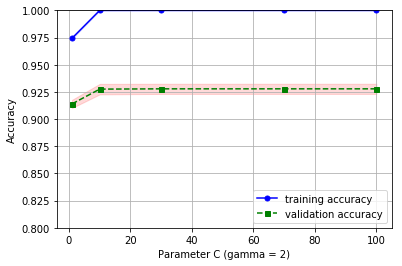

In [15]:
plt.plot(param_range, train_mean, color='blue', marker='o', markersize=5, label='training accuracy')
plt.fill_between(param_range, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(param_range, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='validation accuracy')
plt.fill_between(param_range, test_mean + test_std, test_mean - test_std, alpha=0.15, color='red')
plt.grid()
#plt.xscale('log')
plt.xlabel('Parameter C (gamma = 2)')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.0])
#plt.savefig('D:\photo\vc.png')
plt.show()

In [16]:
#gamma = 5
from sklearn.model_selection import validation_curve
param_range = [1,10 ,30 , 70, 100]    # c
model = SVC(kernel = 'rbf' ,random_state=42 ,decision_function_shape = 'ovo',gamma = 5)
#pipkine 無法用現暫不用
train_scores, test_scores = validation_curve(estimator=model, X=X_train, y=y_train, param_name='C', param_range=param_range, cv=5)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

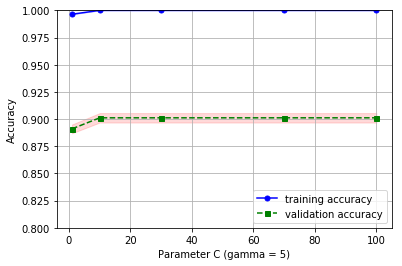

In [17]:
plt.plot(param_range, train_mean, color='blue', marker='o', markersize=5, label='training accuracy')
plt.fill_between(param_range, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(param_range, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='validation accuracy')
plt.fill_between(param_range, test_mean + test_std, test_mean - test_std, alpha=0.15, color='red')
plt.grid()
#plt.xscale('log')
plt.xlabel('Parameter C (gamma = 5)')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.0])
#plt.savefig('D:\photo\vc.png')
plt.show()